___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [123]:
ad_data = pd.read_csv("advertising-Copy1.csv")

**Check the head of ad_data**

In [124]:
ad_data.head(5)

Daily Time Spent on Site      ...        Clicked on Ad
0                     68.95      ...                    0
1                     80.23      ...                    0
2                     69.47      ...                    0
3                     74.15      ...                    0
4                     68.37      ...                    0

[5 rows x 10 columns]

** Use info and describe() on ad_data**

In [125]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [126]:
ad_data.describe()

Daily Time Spent on Site      ...        Clicked on Ad
count               1000.000000      ...           1000.00000
mean                  65.000200      ...              0.50000
std                   15.853615      ...              0.50025
min                   32.600000      ...              0.00000
25%                   51.360000      ...              0.00000
50%                   68.215000      ...              0.50000
75%                   78.547500      ...              1.00000
max                   91.430000      ...              1.00000

[8 rows x 6 columns]

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

D:\Users\bruno\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



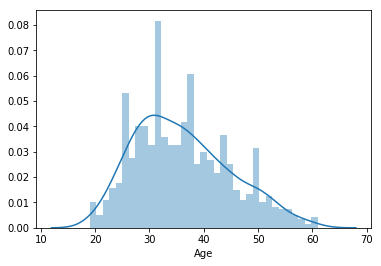

In [127]:
sns.distplot(ad_data.iloc[:,1], bins=35)

**Create a jointplot showing Area Income versus Age.**

D:\Users\bruno\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<Figure size 936x648 with 0 Axes>

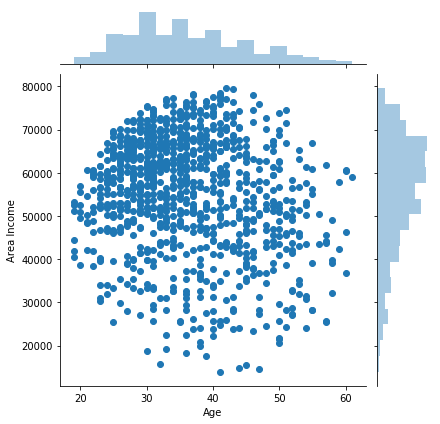

In [128]:
plt.figure(figsize=(13,9))
sns.jointplot(x=ad_data['Age'], y=ad_data['Area Income'], data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

D:\Users\bruno\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



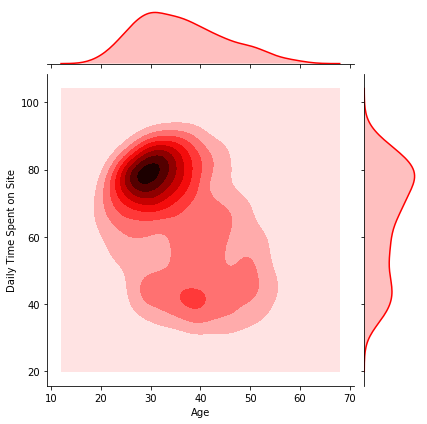

In [129]:
sns.jointplot(x=ad_data['Age'], y=ad_data['Daily Time Spent on Site'], kind='kde', color='Red')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

D:\Users\bruno\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<Figure size 936x648 with 0 Axes>

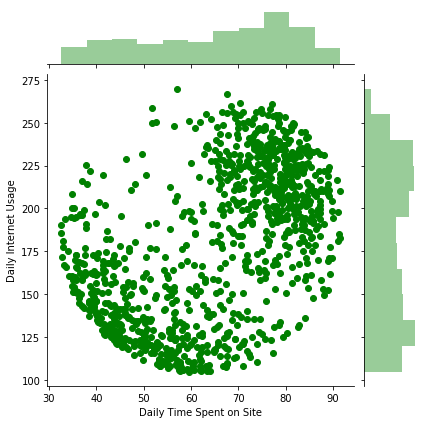

In [130]:
plt.figure(figsize=(13,9))
sns.jointplot(x=ad_data['Daily Time Spent on Site'], y=ad_data['Daily Internet Usage'], data=ad_data, color='Green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

D:\Users\bruno\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

D:\Users\bruno\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

D:\Users\bruno\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars

D:\Users\bruno\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce



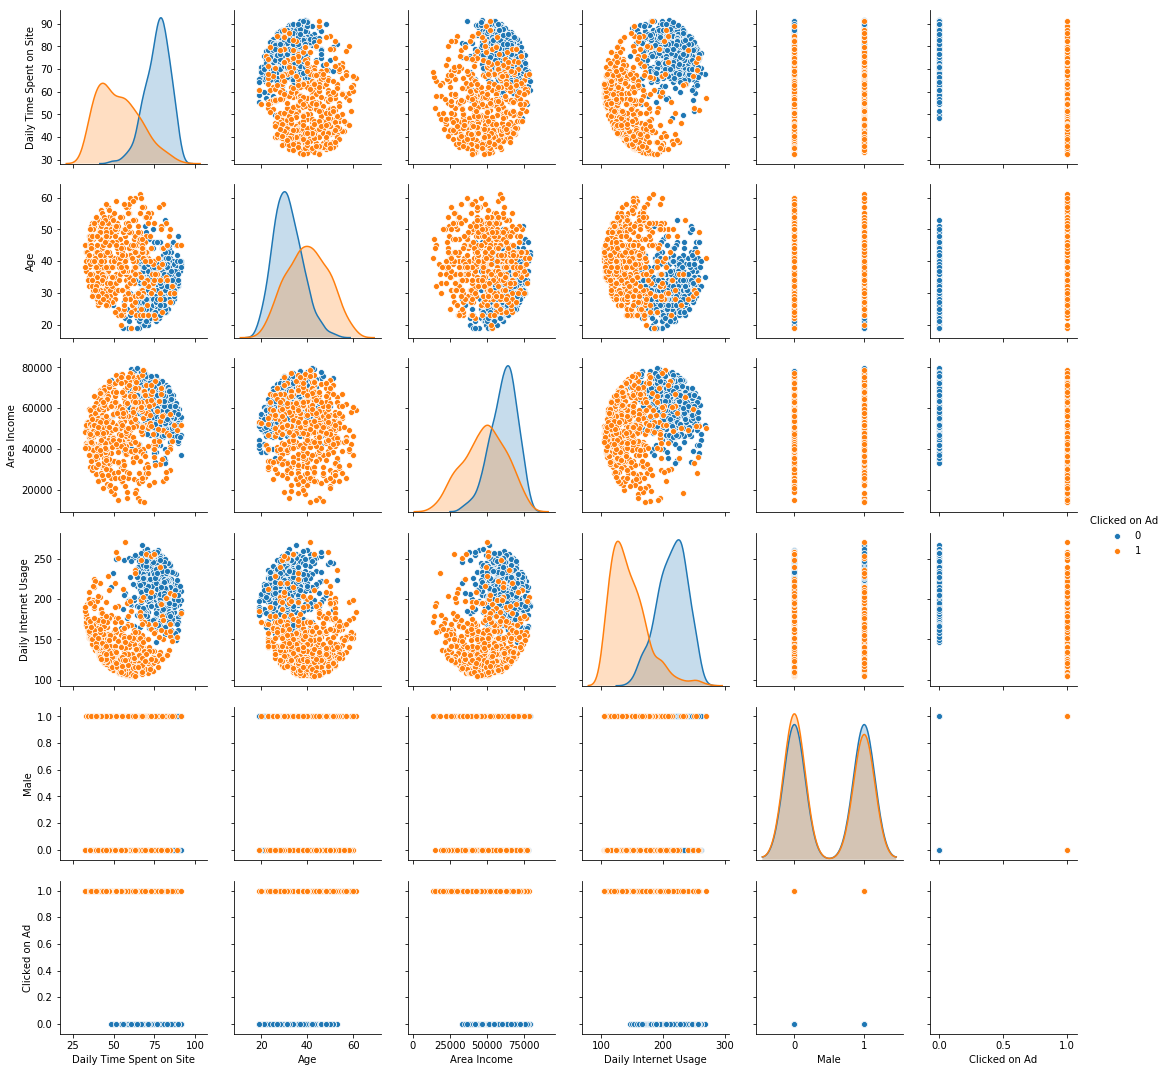

In [131]:
sns.pairplot(ad_data, hue='Clicked on Ad')

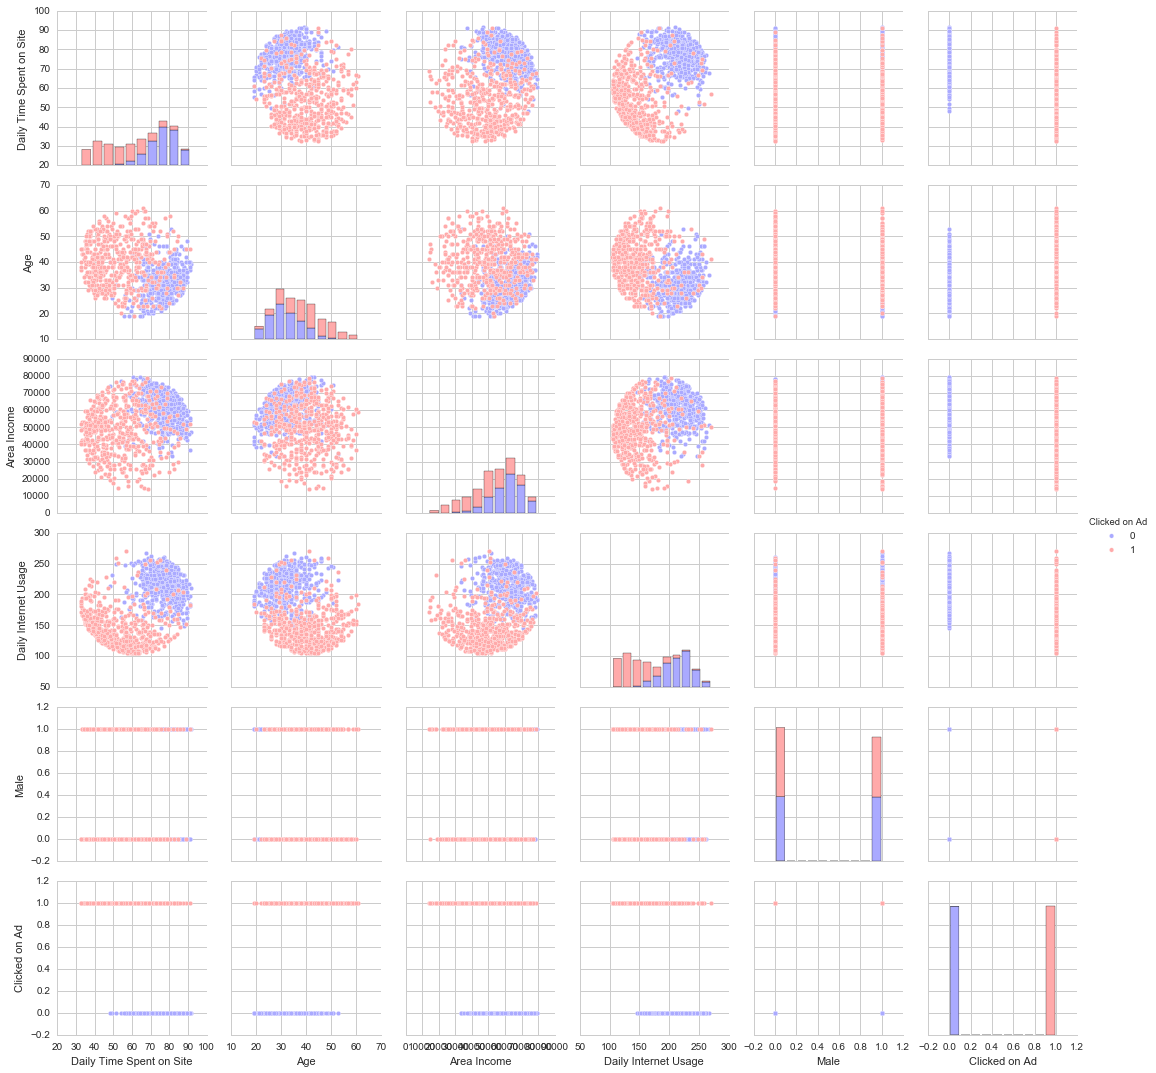

# Custom: Let's treat the data a little bit

##### First: Missing Data

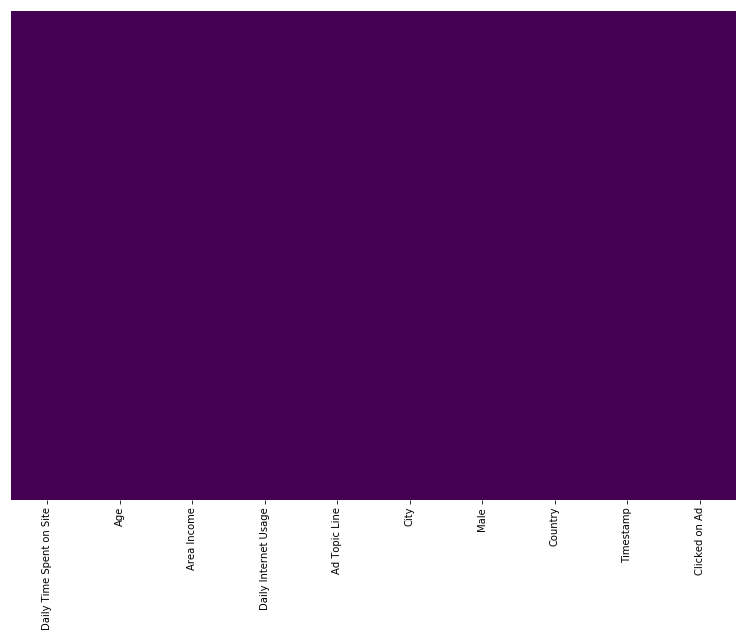

In [132]:
plt.figure(figsize=(13,9))
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [133]:
for k, v in ad_data.nunique().to_dict().items():
    print('{}={}'.format(k,v))  

Daily Time Spent on Site=900
Age=43
Area Income=1000
Daily Internet Usage=966
Ad Topic Line=1000
City=969
Male=2
Country=237
Timestamp=1000
Clicked on Ad=2


In [134]:
ad_data.nunique().to_dict()

{'Daily Time Spent on Site': 900,
 'Age': 43,
 'Area Income': 1000,
 'Daily Internet Usage': 966,
 'Ad Topic Line': 1000,
 'City': 969,
 'Male': 2,
 'Country': 237,
 'Timestamp': 1000,
 'Clicked on Ad': 2}

In [135]:
ad_data_items = pd.DataFrame(ad_data.nunique().to_dict(), index=ad_data['Timestamp'])

In [136]:
list(ad_data_items.columns)

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Ad Topic Line',
 'City',
 'Male',
 'Country',
 'Timestamp',
 'Clicked on Ad']

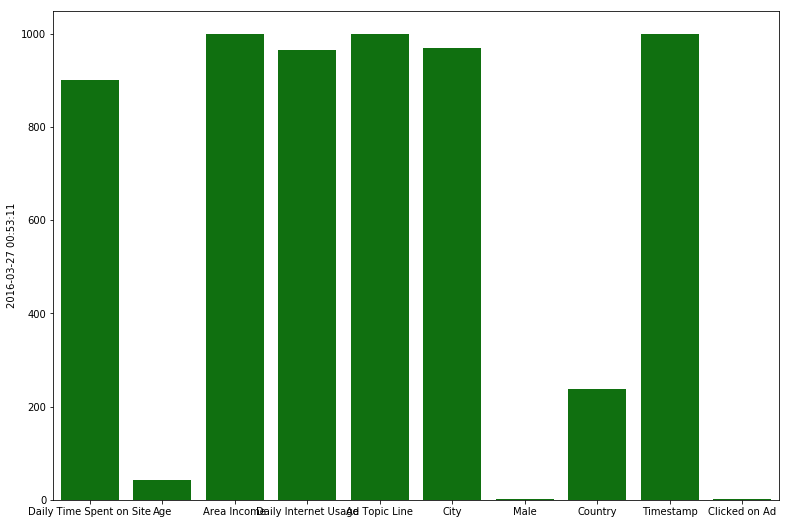

In [137]:
plt.figure(figsize=((13,9)))
sns.barplot(x=list(ad_data_items.columns), y=ad_data_items.iloc[0,:], ci=80, color="Green")

In [138]:
ad_data_bkp = ad_data.copy()

In [139]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [140]:
ad_data['Ad Topic Line'] = pd.Categorical(ad_data['Ad Topic Line'])
ad_data['Ad Topic Line'] = ad_data['Ad Topic Line'].cat.codes

ad_data['City'] = pd.Categorical(ad_data['City'])
ad_data['City'] = ad_data['City'].cat.codes

ad_data['Country'] = pd.Categorical(ad_data['Country'])
ad_data['Country'] = ad_data['Country'].cat.codes

In [141]:
del ad_data['Timestamp']

In [142]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null int16
City                        1000 non-null int16
Male                        1000 non-null int64
Country                     1000 non-null int16
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int16(3), int64(3)
memory usage: 52.8 KB


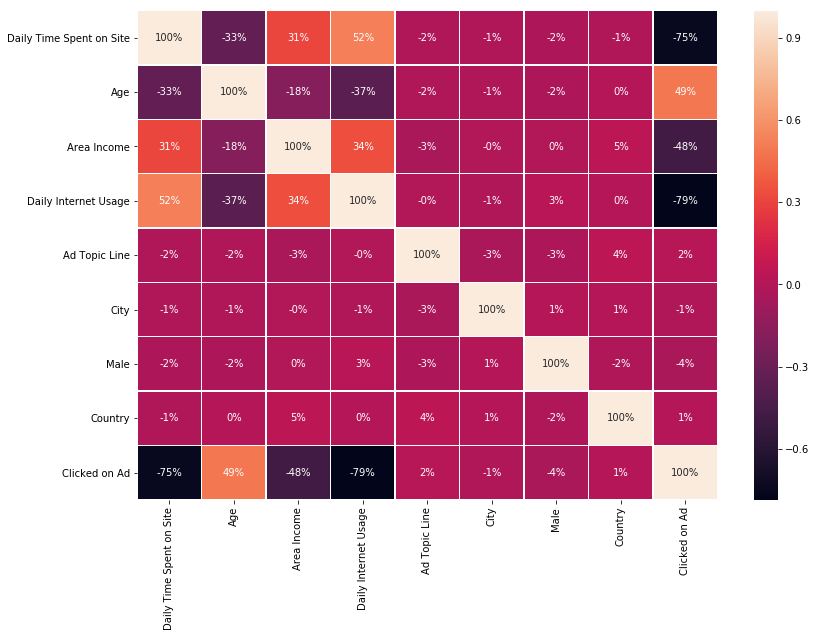

In [216]:
font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }

f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(ad_data.corr(), annot=True, fmt=".00%", linewidths=.5, ax=ax)

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [146]:
ad_data.head(2)

Daily Time Spent on Site  Age      ...        Country  Clicked on Ad
0                     68.95   35      ...            215              0
1                     80.23   31      ...            147              0

[2 rows x 9 columns]

In [160]:
X = ad_data.iloc[:,0:-1]
y = ad_data.iloc[:,-1]

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [164]:
model = LogisticRegression()

In [217]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [218]:
predictions = model.predict(X_test)

** Create a classification report for the model.**

In [219]:
from sklearn.metrics import confusion_matrix, classification_report

In [222]:
cfm = confusion_matrix(y_test, predictions)

In [235]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null int16
City                        1000 non-null int16
Male                        1000 non-null int64
Country                     1000 non-null int16
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int16(3), int64(3)
memory usage: 52.8 KB



Intercept: [0.09379662]

Regressin: [[-6.24714949e-02  2.35026421e-01 -1.95059720e-05 -2.95153363e-02
   2.48842063e-03  9.08333596e-04 -2.51121125e-03  4.42215110e-03]]

Accuracy: 0.9181818181818182

	             precision    recall  f1-score   support

          0       0.91      0.93      0.92       171
          1       0.92      0.91      0.91       159

avg / total       0.92      0.92      0.92       330



Text(0.5,15,'Predicted label')

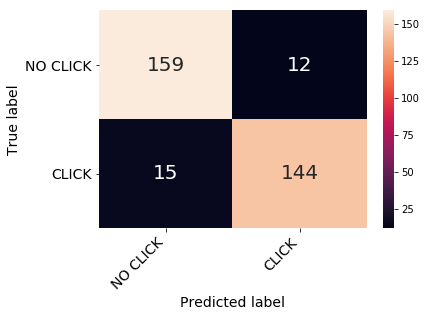

In [237]:
print(f"\nIntercept: {model.intercept_}")
print(f"\nRegressin: {model.coef_}")
print(f"\nAccuracy: {model.score(X_test, y_test)}")
print(f"\n\t{classification_report(y_test, predictions)}")
confusion_matrix_df = pd.DataFrame(cfm, ('NO CLICK', 'CLICK'), ('NO CLICK', 'CLICK'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

## Great Job!

In [238]:
# One more change

In [240]:
pwd

'D:\\Users\\bruno\\Documents\\Coding\\Python\\data_science_bootcamp\\Machine Learning Sections\\Logistic-Regression'

In [ ]:
pwd